In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import utils
import utils_analysis as uta
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 8})

In [3]:
uta.get_aib9_info('cfm', 0, 'total', '1')

{'Architecture': 'CNF',
 'Training data amount': 80000,
 'Learnable parameters': 17254409,
 'Iterations': 30,
 'Speed (samples/s)': 207.70587517269624,
 'Final KLD': 214.61997566507026,
 'Final WD': 0.00196694900628484,
 'Dimensions': 18,
 'Total train/sample time': 759.1270363330841,
 'Residue KLD': array([80.32624772, 60.7688189 , 46.87180938, 46.35871442, 45.17118228,
        49.02246538, 50.40873798, 54.9227282 , 79.11958356]),
 'dataset_limiter': 200000,
 'path_dim': 18,
 'path_modes': 4,
 'split': [0.8, 0.1, 0.1],
 'batch_size': 512,
 'bounds': [-4.0, 4.0, -4.0, 4.0],
 'lr': 0.0005,
 'w': 1000,
 'sigma': 0.1,
 'model_style': 'ExactOptimalTransportConditionalFlowMatcher',
 'time_varying': True,
 'resnet_block_groups': 4,
 'learned_sinusoidal_cond': True,
 'learned_sinusoidal_dim': 16,
 'dim_mults': [1, 2, 4],
 'model_dim': 128,
 'device': 'cuda:0',
 'epoch_max': 30,
 'aib9_status': True,
 'data_type': 'total',
 'residue': 0,
 'keyword': '1',
 'input': 'data_input/aib9_total_0.npy'

In [4]:
uta.get_info('cfm', 50, 4, '40000_varyingsize_1')

{'Architecture': 'CFM',
 'Training data amount': 32000,
 'Learnable parameters': 17254409,
 'Iterations': 30,
 'Speed (samples/s)': 204.13735102071013,
 'Final KLD': 598.9666173564611,
 'Final WD': 0.00017274305555555259,
 'Dimensions': 50,
 'Total train/sample time': 290.70387291908264,
 'dataset_limiter': 40000,
 'path_dim': 50,
 'path_modes': 4,
 'split': [0.8, 0.1, 0.1],
 'batch_size': 512,
 'bounds': [-12.0, 12.0, -12.0, 12.0],
 'lr': 0.0005,
 'w': 1000,
 'sigma': 0.1,
 'model_style': 'ExactOptimalTransportConditionalFlowMatcher',
 'time_varying': True,
 'resnet_block_groups': 4,
 'learned_sinusoidal_cond': True,
 'learned_sinusoidal_dim': 16,
 'dim_mults': [1, 2, 4],
 'model_dim': 128,
 'device': 'cuda:0',
 'epoch_max': 30,
 'aib9_status': True,
 'data_type': 'raw',
 'residue': 1,
 'keyword': '40000_varyingsize_1',
 'input': 'data_input/dim_50_modes_4.npy',
 'data_output': 'data_output/cfm_data/data_dim_50_modes_4_40000_varyingsize_1',
 'info_output': 'data_output/cfm_data/info_d

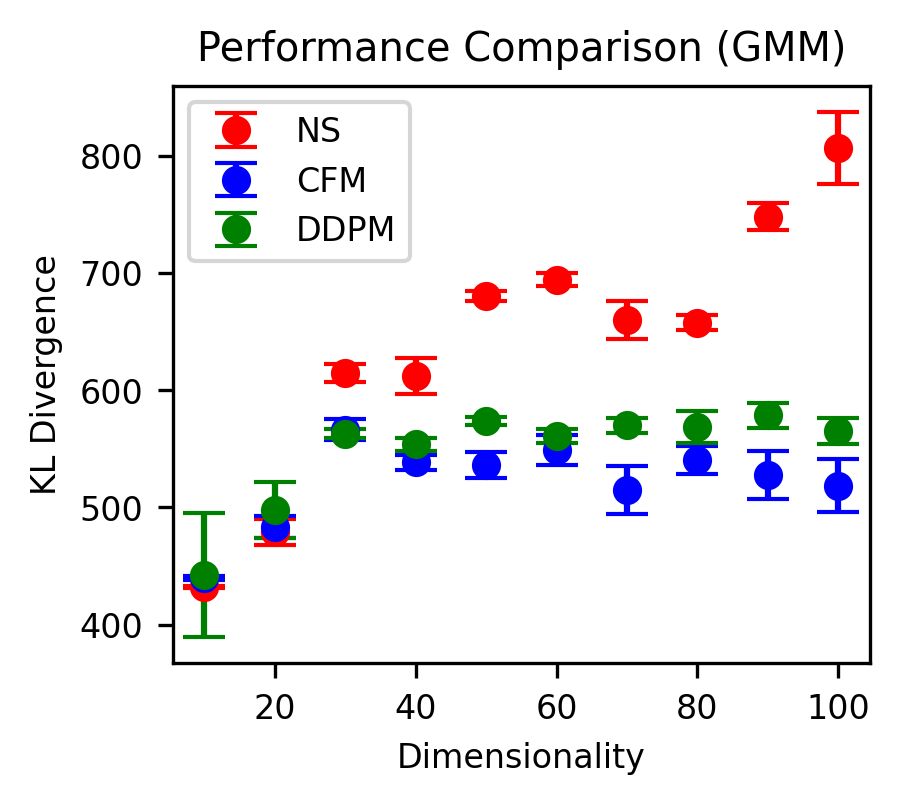

In [7]:
# gmm: model performance comparison vs dimension

modes_setting = 4

dim_array = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

ns_KLD_1 = uta.get_values_from_dim('ns', dim_array, modes_setting, 'varyingdim_1', 'Final KLD')
ns_KLD_2 = uta.get_values_from_dim('ns', dim_array, modes_setting, 'varyingdim_2', 'Final KLD')
ns_KLD_3 = uta.get_values_from_dim('ns', dim_array, modes_setting, 'varyingdim_3', 'Final KLD')

cfm_KLD_1 = uta.get_values_from_dim('cfm', dim_array, modes_setting, 'varyingdim_1', 'Final KLD')
cfm_KLD_2 = uta.get_values_from_dim('cfm', dim_array, modes_setting, 'varyingdim_2', 'Final KLD')
cfm_KLD_3 = uta.get_values_from_dim('cfm', dim_array, modes_setting, 'varyingdim_3', 'Final KLD')

ddpm_KLD_1 = uta.get_values_from_dim('ddpm', dim_array, modes_setting, 'varyingdim_1', 'Final KLD')
ddpm_KLD_2 = uta.get_values_from_dim('ddpm', dim_array, modes_setting, 'varyingdim_2', 'Final KLD')
ddpm_KLD_3 = uta.get_values_from_dim('ddpm', dim_array, modes_setting, 'varyingdim_3', 'Final KLD')

ns_all_arrays = np.array([ns_KLD_1, ns_KLD_2, ns_KLD_3])
cfm_all_arrays = np.array([cfm_KLD_1, cfm_KLD_2, cfm_KLD_3])
ddpm_all_arrays = np.array([ddpm_KLD_1, ddpm_KLD_2, ddpm_KLD_3])

ns_mean_KLD = np.mean(ns_all_arrays, axis=0)
ns_std_KLD = np.std(ns_all_arrays, axis=0)

cfm_mean_KLD = np.mean(cfm_all_arrays, axis=0)
cfm_std_KLD = np.std(cfm_all_arrays, axis=0)

ddpm_mean_KLD = np.mean(ddpm_all_arrays, axis=0)
ddpm_std_KLD = np.std(ddpm_all_arrays, axis=0)

plt.figure(figsize=(3, 2.5))

plt.errorbar(dim_array, ns_mean_KLD, yerr = ns_std_KLD, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(dim_array, cfm_mean_KLD, yerr = cfm_std_KLD, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(dim_array, ddpm_mean_KLD, yerr = ddpm_std_KLD, fmt='o', capsize=5, label='DDPM', color='green')

plt.xlabel('Dimensionality')
plt.ylabel('KL Divergence')
plt.title(f"Performance Comparison (GMM)")

plt.legend()

plt.show()

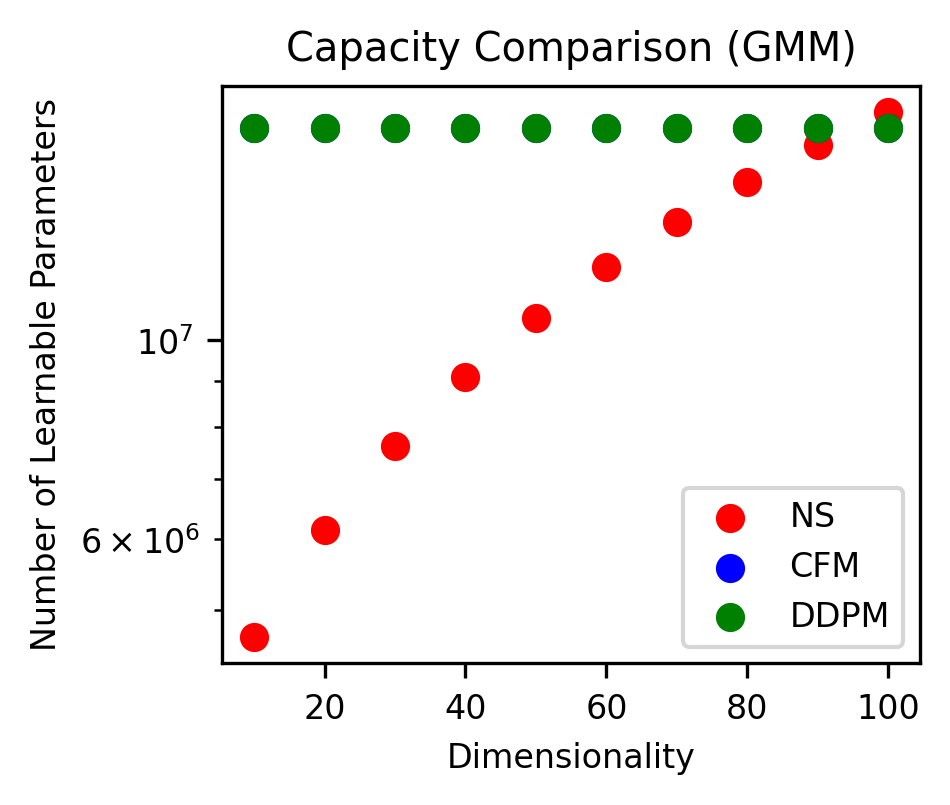

In [10]:
# gmm: model capacity comparison vs dimension

modes_setting = 4

dim_array = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

ns_params = uta.get_values_from_dim('ns', dim_array, modes_setting, 'varyingdim_1', 'Learnable parameters')
cfm_params = uta.get_values_from_dim('cfm', dim_array, modes_setting, 'varyingdim_1', 'Learnable parameters')
ddpm_params = uta.get_values_from_dim('ddpm', dim_array, modes_setting, 'varyingdim_1', 'Learnable parameters')

plt.figure(figsize=(3, 2.5))

plt.scatter(dim_array, ns_params, label='NS', color='red')
plt.scatter(dim_array, cfm_params, label='CFM', color='blue')
plt.scatter(dim_array, ddpm_params, label='DDPM', color='green')

plt.xlabel('Dimensionality')
plt.ylabel('Number of Learnable Parameters')
plt.title(f'Capacity Comparison (GMM)')

plt.yscale('log')

plt.legend()

plt.show()

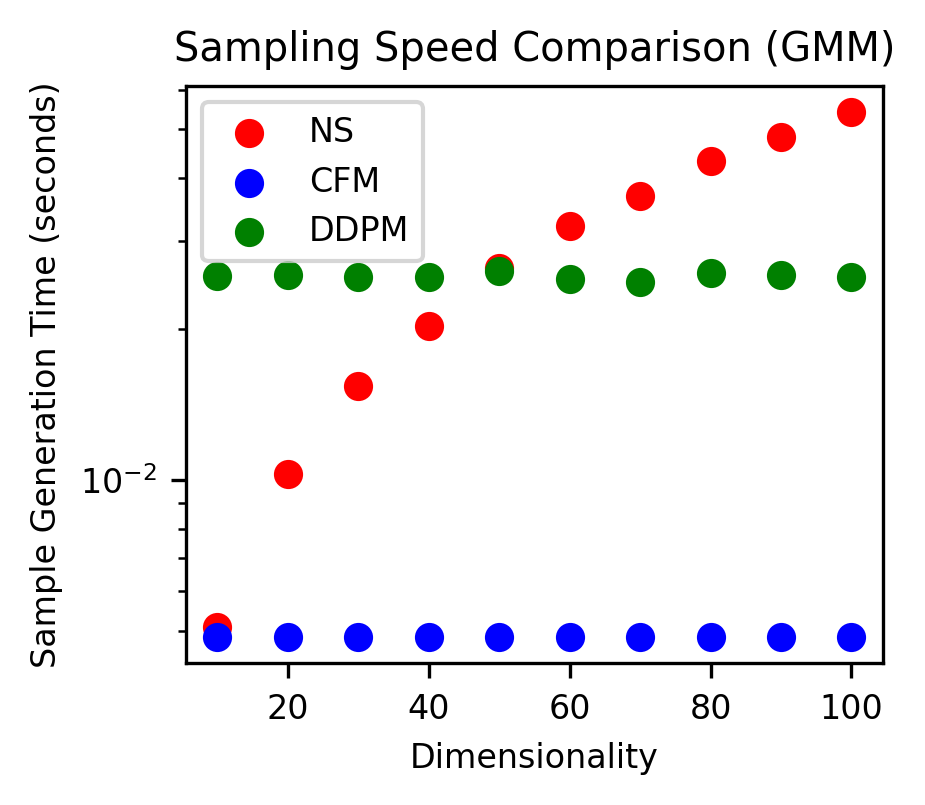

In [12]:
# gmm: model sampling speed comparison vs dimension

modes_setting = 4

dim_array = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

ns_speed = uta.get_values_from_dim('ns', dim_array, modes_setting, 'varyingdim_1', 'Speed (samples/s)')
cfm_speed = uta.get_values_from_dim('cfm', dim_array, modes_setting, 'varyingdim_1', 'Speed (samples/s)')
ddpm_speed = uta.get_values_from_dim('ddpm', dim_array, modes_setting, 'varyingdim_1', 'Speed (samples/s)')

plt.figure(figsize=(3, 2.5))

plt.scatter(dim_array, 1/ns_speed, label='NS', color='red')
plt.scatter(dim_array, 1/cfm_speed, label='CFM', color='blue')
plt.scatter(dim_array, 1/ddpm_speed, label='DDPM', color='green')

plt.xlabel('Dimensionality')
plt.ylabel('Sample Generation Time (seconds)')
plt.title(f'Sampling Speed Comparison (GMM)')

plt.yscale('log')

plt.legend()

plt.show()

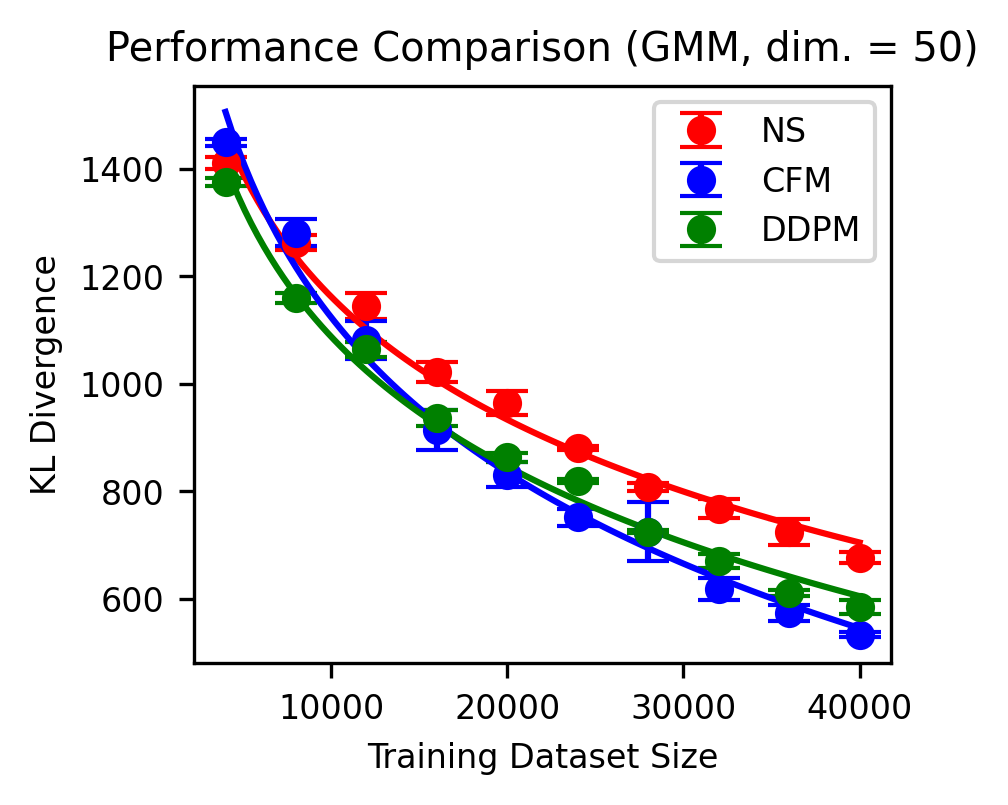

In [28]:
# gmm: model performance comparison vs training data

size_array = np.array([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])

ddpm_KLD_size_1 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Final KLD')
ddpm_KLD_size_2 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Final KLD')
ddpm_KLD_size_3 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Final KLD')

cfm_KLD_size_1 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Final KLD')
cfm_KLD_size_2 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Final KLD')
cfm_KLD_size_3 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Final KLD')

ns_KLD_size_1 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Final KLD')
ns_KLD_size_2 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Final KLD')
ns_KLD_size_3 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Final KLD')

ns_all_arrays_size = np.array([ns_KLD_size_1, ns_KLD_size_2, ns_KLD_size_3])
cfm_all_arrays_size = np.array([cfm_KLD_size_1, cfm_KLD_size_2, cfm_KLD_size_3])
ddpm_all_arrays_size = np.array([ddpm_KLD_size_1, ddpm_KLD_size_2, ddpm_KLD_size_3])

ns_mean_KLD_size = np.mean(ns_all_arrays_size, axis=0)
ns_std_KLD_size = np.std(ns_all_arrays_size, axis=0)

cfm_mean_KLD_size = np.mean(cfm_all_arrays_size, axis=0)
cfm_std_KLD_size = np.std(cfm_all_arrays_size, axis=0)

ddpm_mean_KLD_size = np.mean(ddpm_all_arrays_size, axis=0)
ddpm_std_KLD_size = np.std(ddpm_all_arrays_size, axis=0)

plt.figure(figsize=(3, 2.5))

plt.errorbar(0.8*size_array, ns_mean_KLD_size, yerr = ns_std_KLD_size, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(0.8*size_array, cfm_mean_KLD_size, yerr = cfm_std_KLD_size, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(0.8*size_array, ddpm_mean_KLD_size, yerr = ddpm_std_KLD_size, fmt='o', capsize=5, label='DDPM', color='green')

def log_func(x, a, b):
    return -a * np.log(x) + b
    
ns_popt, ns_pcov = curve_fit(log_func, 0.8*size_array, ns_mean_KLD_size)
ns_a_fit = ns_popt[0]
ns_b_fit = ns_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *ns_popt), 'r-')

cfm_popt, cfm_pcov = curve_fit(log_func, 0.8*size_array, cfm_mean_KLD_size)
cfm_a_fit = cfm_popt[0]
cfm_b_fit = cfm_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *cfm_popt), 'b-')

ddpm_popt, ddpm_pcov = curve_fit(log_func, 0.8*size_array, ddpm_mean_KLD_size)
ddpm_a_fit = ddpm_popt[0]
ddpm_b_fit = ddpm_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *ddpm_popt), 'g-')

plt.xlabel('Training Dataset Size')
plt.ylabel('KL Divergence')
plt.title(f"Performance Comparison (GMM, dim. = 50)")

plt.legend()

plt.show()

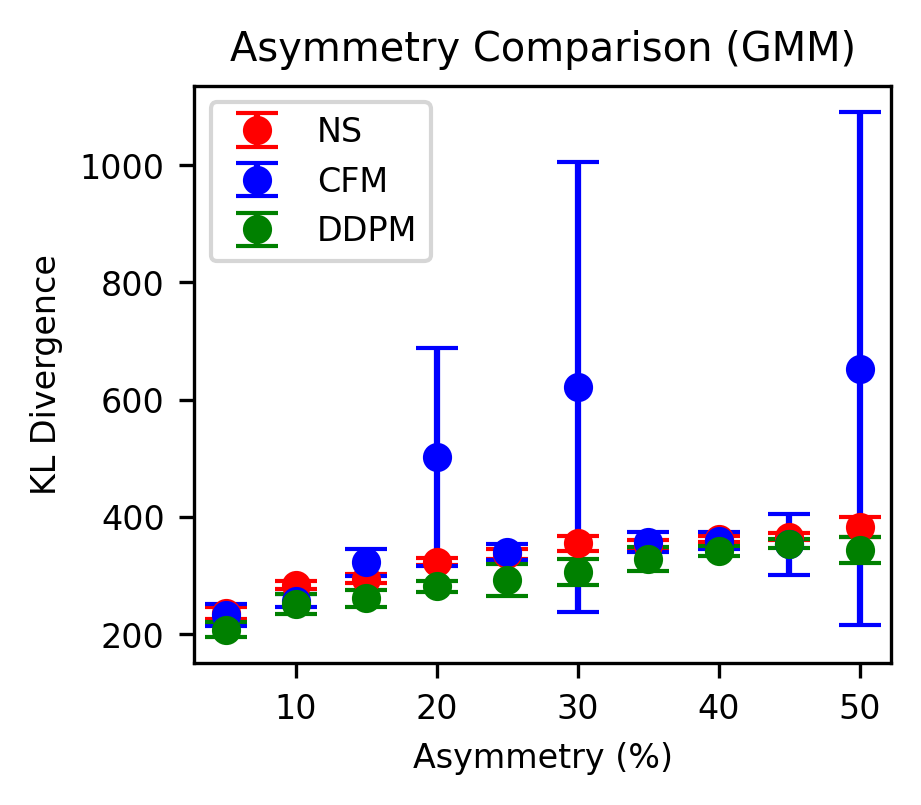

In [9]:
# gmm: model performance comparison vs asymmetry

asym_array = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

ns_KLD_a_1 = uta.get_values_from_keyword('ns', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 1), 'Final KLD')
ns_KLD_a_2 = uta.get_values_from_keyword('ns', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 2), 'Final KLD')
ns_KLD_a_3 = uta.get_values_from_keyword('ns', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 3), 'Final KLD')

cnf_KLD_a_1 = uta.get_values_from_keyword('cnf', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'mlp_varyingmodes', 1), 'Final KLD')
cnf_KLD_a_2 = uta.get_values_from_keyword('cnf', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'mlp_varyingmodes', 2), 'Final KLD')
cnf_KLD_a_3 = uta.get_values_from_keyword('cnf', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'mlp_varyingmodes', 3), 'Final KLD')

ddpm_KLD_a_1 = uta.get_values_from_keyword('ddpm', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 1), 'Final KLD')
ddpm_KLD_a_2 = uta.get_values_from_keyword('ddpm', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 2), 'Final KLD')
ddpm_KLD_a_3 = uta.get_values_from_keyword('ddpm', 50, 2, uta.construct_iterated_keyword_array(asym_array, 'varyingmodes', 3), 'Final KLD')

ns_a_all_arrays = np.array([ns_KLD_a_1, ns_KLD_a_2, ns_KLD_a_3])
cnf_a_all_arrays = np.array([cnf_KLD_a_1, cnf_KLD_a_2, cnf_KLD_a_3])
ddpm_a_all_arrays = np.array([ddpm_KLD_a_1, ddpm_KLD_a_2, ddpm_KLD_a_3])

ns_a_mean_KLD = np.mean(ns_a_all_arrays, axis=0)
ns_a_std_KLD = np.std(ns_a_all_arrays, axis=0)

cnf_a_mean_KLD = np.mean(cnf_a_all_arrays, axis=0)
cnf_a_std_KLD = np.std(cnf_a_all_arrays, axis=0)

ddpm_a_mean_KLD = np.mean(ddpm_a_all_arrays, axis=0)
ddpm_a_std_KLD = np.std(ddpm_a_all_arrays, axis=0)

plt.figure(figsize=(3, 2.5))

plt.errorbar(asym_array, ns_a_mean_KLD, yerr = ns_a_std_KLD, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(asym_array, cnf_a_mean_KLD, yerr = cnf_a_std_KLD, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(asym_array, ddpm_a_mean_KLD, yerr = ddpm_a_std_KLD, fmt='o', capsize=5, label='DDPM', color='green')

plt.xlabel('Asymmetry (%)')
plt.ylabel('KL Divergence')
plt.title(f"Asymmetry Comparison (GMM)")

plt.legend()

plt.show()

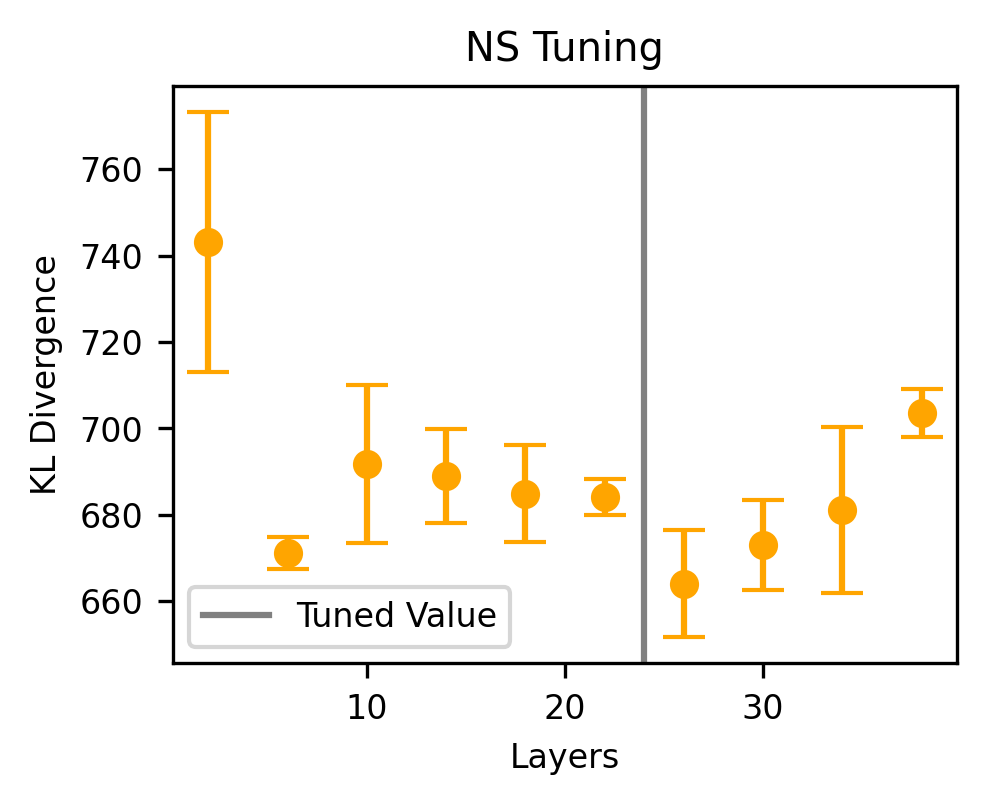

In [10]:
# ns: hyperparameter tuning

layers_array = np.array([2, 6, 10, 14, 18, 22, 26, 30, 34, 38])

ns_KLD_layers_50_1 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(layers_array, 'varyinglayers', 1), 'Final KLD')
ns_KLD_layers_50_2 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(layers_array, 'varyinglayers', 2), 'Final KLD')
ns_KLD_layers_50_3 = uta.get_values_from_keyword('ns', 50, 4, uta.construct_iterated_keyword_array(layers_array, 'varyinglayers', 3), 'Final KLD')

ns_all_arrays_50 = np.array([ns_KLD_layers_50_1, ns_KLD_layers_50_2, ns_KLD_layers_50_3])

ns_mean_KLD_layers_50 = np.mean(ns_all_arrays_50, axis=0)
ns_std_KLD_layers_50 = np.std(ns_all_arrays_50, axis=0)

plt.figure(figsize=(3.375, 2.5))

plt.errorbar(layers_array, ns_mean_KLD_layers_50, yerr = ns_std_KLD_layers_50, fmt='o', capsize=5, color='orange')
plt.axvline(x=24, color='gray', linestyle='-', label='Tuned Value')

plt.xlabel('Layers')
plt.ylabel('KL Divergence')
plt.title('NS Tuning')
plt.legend()

plt.show()

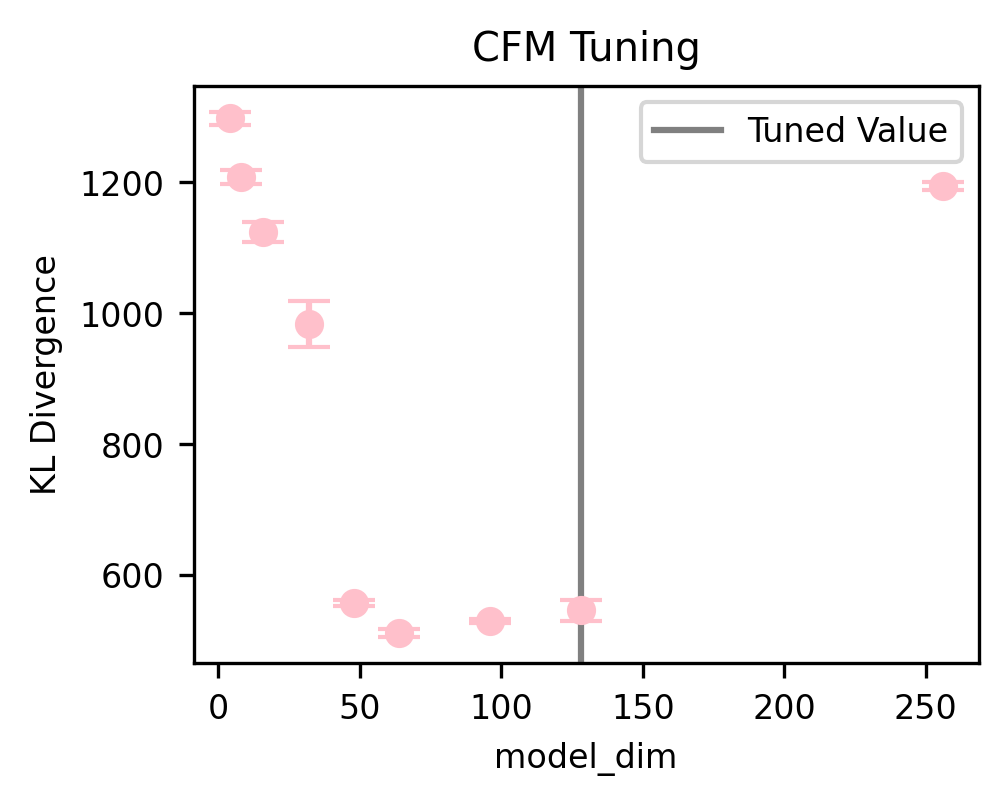

In [17]:
# cnf: hyperparameter tuning

model_dim_array = np.array([4, 8, 16, 32, 48, 64, 96, 128, 256])

#cfm_KLD_md_50_1 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 1), 'Final KLD')
cfm_KLD_md_50_2 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 2), 'Final KLD')
cfm_KLD_md_50_3 = uta.get_values_from_keyword('cfm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 3), 'Final KLD')

cfm_all_arrays_50 = np.array([cfm_KLD_md_50_2, cfm_KLD_md_50_3])

cfm_mean_KLD_md_50 = np.mean(cfm_all_arrays_50, axis=0)
cfm_std_KLD_md_50 = np.std(cfm_all_arrays_50, axis=0)

plt.figure(figsize=(3.375, 2.5))

plt.errorbar(model_dim_array, cfm_mean_KLD_md_50, yerr = cfm_std_KLD_md_50, fmt='o', capsize=5, color='pink')
plt.axvline(x=128, color='gray', linestyle='-', label='Tuned Value')

plt.xlabel('model_dim')
plt.ylabel('KL Divergence')
plt.title('CFM Tuning')

plt.legend()

plt.show()

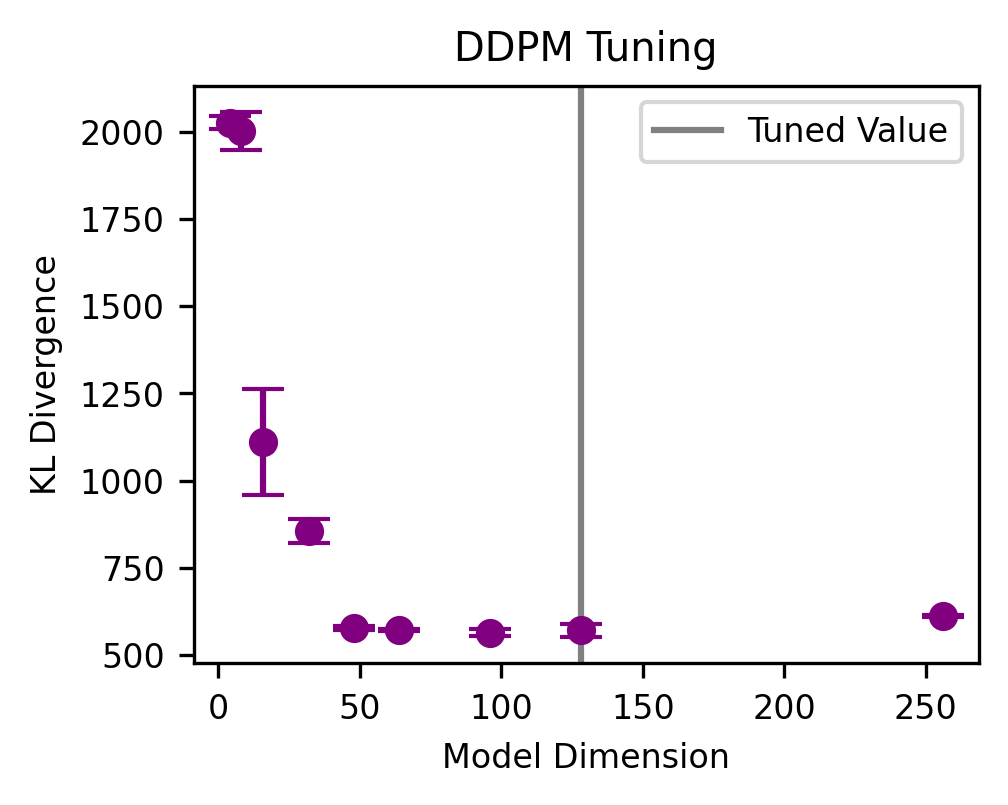

In [18]:
# ddpm: hyperparameter tuning

model_dim_array = np.array([4, 8, 16, 32, 48, 64, 96, 128, 256])

ddpm_KLD_md_50_1 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 1), 'Final KLD')
ddpm_KLD_md_50_2 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 2), 'Final KLD')
ddpm_KLD_md_50_3 = uta.get_values_from_keyword('ddpm', 50, 4, uta.construct_iterated_keyword_array(model_dim_array, 'varyingmodel_dim', 3), 'Final KLD')

ddpm_all_arrays_50 = np.array([ddpm_KLD_md_50_1, ddpm_KLD_md_50_2, ddpm_KLD_md_50_3])

ddpm_mean_KLD_md_50 = np.mean(ddpm_all_arrays_50, axis=0)
ddpm_std_KLD_md_50 = np.std(ddpm_all_arrays_50, axis=0)

plt.figure(figsize=(3.375, 2.5))

plt.errorbar(model_dim_array, ddpm_mean_KLD_md_50, yerr = ddpm_std_KLD_md_50, fmt='o', capsize=5, color='purple')
plt.axvline(x=128, color='gray', linestyle='-', label='Tuned Value')

plt.xlabel('Model Dimension')
plt.ylabel('KL Divergence')
plt.title('DDPM Tuning')
plt.legend()

plt.show()

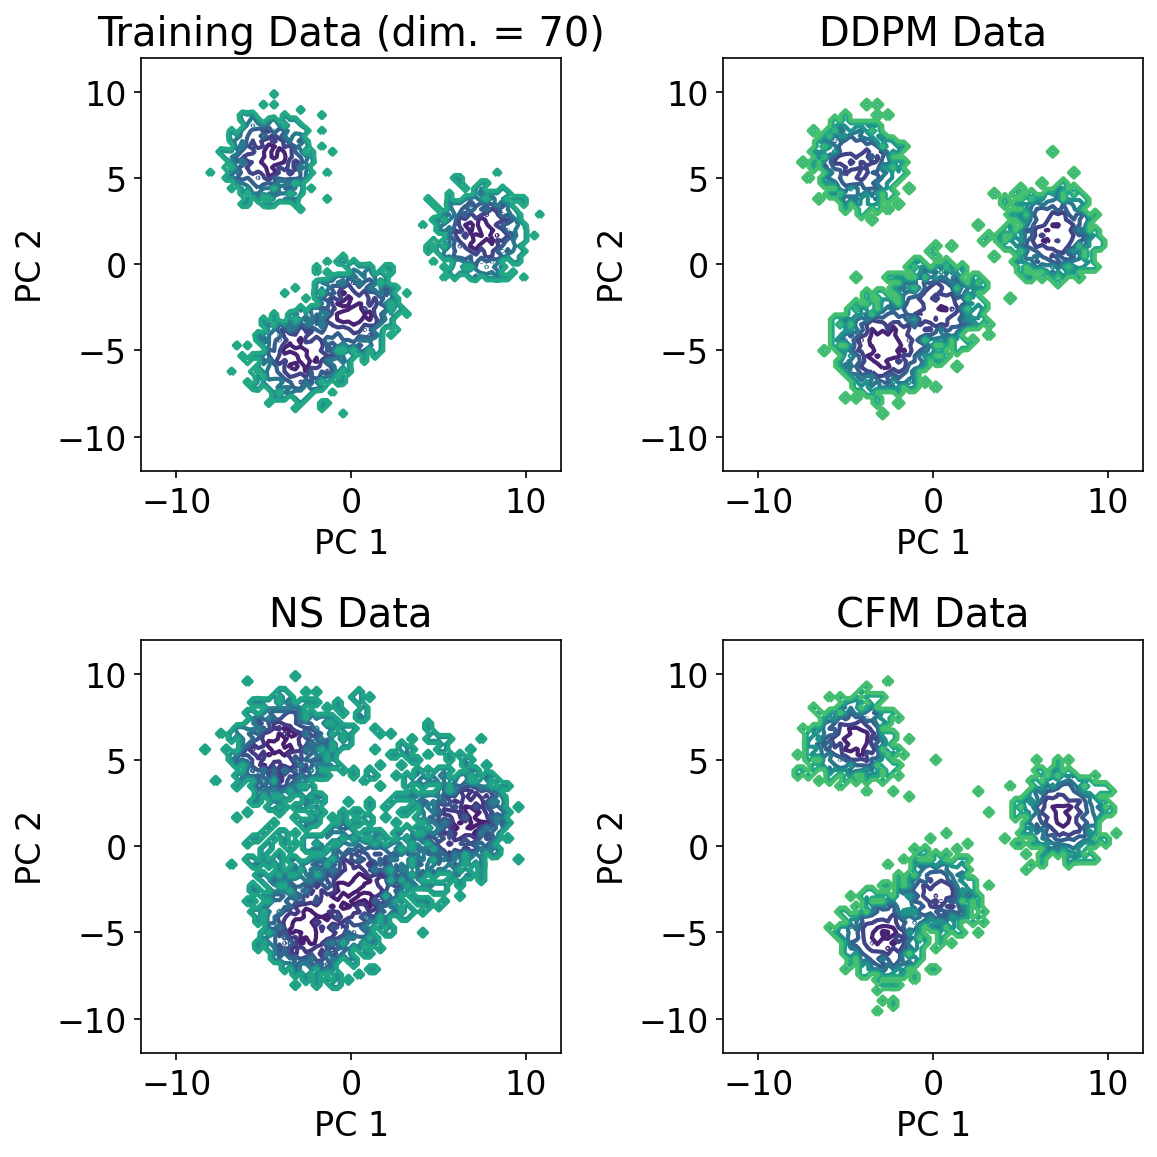

In [24]:
# gmm: data pca comparison

display_dim = 70
display_modes = 4
asym = 50
#display_keyword = f'{asym}_varyingmodes_3'
display_keyword = 'varyingdim_1'

def get_asym_training_data(dimension, modes, asym):
    data = np.load(f"data_input/dim_{dimension}_modes_{modes}_{asym}.npy", allow_pickle=True)
    return data

training_data = uta.get_training_data(display_dim, display_modes)
#training_data = get_asym_training_data(display_dim, display_modes, asym)
training_length = training_data.shape[0]
ns_generated_data = uta.get_data('ns', display_dim, display_modes, display_keyword)
cfm_generated_data = uta.get_data('cfm', display_dim, display_modes, display_keyword)
ddpm_generated_data = uta.get_data('ddpm', display_dim, display_modes, display_keyword)
generated_length = ns_generated_data.shape[0]
pca = PCA(n_components=2)
training_pca = pca.fit_transform(training_data)
ns_generated_pca = pca.transform(ns_generated_data)
cfm_generated_pca = pca.transform(cfm_generated_data)
ddpm_generated_pca = pca.transform(ddpm_generated_data)

bounds = np.array([-12, 12, -12, 12])

def FE_hist(data, bounds, binw=0.1, binner=None):

    if binner is None:
        binner = (np.arange(bounds[0], bounds[1] + binw, binw),
                    np.arange(bounds[2], bounds[3] + binw, binw))

    counts, xedges, yedges = np.histogram2d(data[:,0], data[:,1],
                                           bins=binner, density=True)
    prob = counts + 1e-3
    G = -np.log(prob)
    G[G == np.inf] = -1
    G[G == -1] = max(G.ravel())
    G -= min(G.ravel())
    return G, xedges, yedges

restrict = min(training_length, generated_length)

G_MD, xe_MD, ye_MD = FE_hist(training_pca[:restrict], bounds, binw=0.3)
G_NS, xe_NS, ye_NS = FE_hist(ns_generated_pca[:restrict], bounds, binw=0.3)
G_CFM, xe_CFM, ye_CFM = FE_hist(cfm_generated_pca[:restrict], bounds, binw=0.3)
G_DDPM, xe_DDPM, ye_DDPM = FE_hist(ddpm_generated_pca[:restrict], bounds, binw=0.3)

fig, axs = plt.subplots(2,2, figsize=(8,8), dpi=150, tight_layout=True)
plt.rcParams.update({'font.size': 16})
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
axs[0][0].contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[0][1].contour(G_DDPM.T, extent=[xe_DDPM[0], xe_DDPM[-1], ye_DDPM[0], ye_DDPM[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1][0].contour(G_NS.T, extent=[xe_NS[0], xe_NS[-1], ye_NS[0], ye_NS[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1][1].contour(G_CFM.T, extent=[xe_CFM[0], xe_CFM[-1], ye_CFM[0], ye_CFM[-1]],
        linewidths=2, vmin = 0, vmax = 6)

axs[0][0].set_xlabel("PC 1")
axs[0][0].set_ylabel("PC 2")
axs[0][0].set_title(f"Training Data (dim. = {display_dim})")
axs[0][1].set_xlabel("PC 1")
axs[0][1].set_ylabel("PC 2")
axs[0][1].set_title("DDPM Data")
axs[1][0].set_xlabel("PC 1")
axs[1][0].set_ylabel("PC 2")
axs[1][0].set_title("NS Data")
axs[1][1].set_xlabel("PC 1")
axs[1][1].set_ylabel("PC 2")
axs[1][1].set_title("CFM Data")
axs[0][0].set_xlim(bounds[0], bounds[1]);
axs[0][0].set_ylim(bounds[2], bounds[3]);
axs[0][1].set_xlim(bounds[0], bounds[1]);
axs[0][1].set_ylim(bounds[2], bounds[3]);

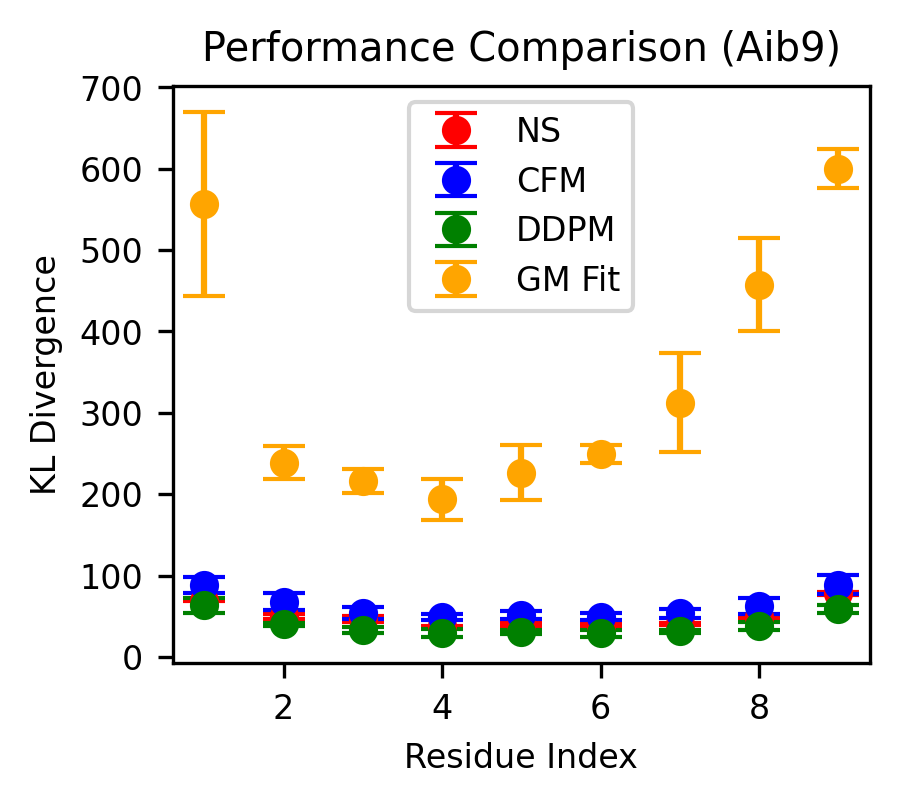

In [25]:
# aib9: model performance comparison vs residue index

res_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

ns_KLD_1_aib9 = uta.get_aib9_info('ns', 0, 'total', '1')['Residue KLD']
ns_KLD_2_aib9 = uta.get_aib9_info('ns', 0, 'total', '2')['Residue KLD']
ns_KLD_3_aib9 = uta.get_aib9_info('ns', 0, 'total', '3')['Residue KLD']

cfm_KLD_1_aib9 = uta.get_aib9_info('cfm', 0, 'total', '1')['Residue KLD']
cfm_KLD_2_aib9 = uta.get_aib9_info('cfm', 0, 'total', '2')['Residue KLD']
cfm_KLD_3_aib9 = uta.get_aib9_info('cfm', 0, 'total', '3')['Residue KLD']

ddpm_KLD_1_aib9 = uta.get_aib9_info('ddpm', 0, 'total', '1')['Residue KLD']
ddpm_KLD_2_aib9 = uta.get_aib9_info('ddpm', 0, 'total', '2')['Residue KLD']
ddpm_KLD_3_aib9 = uta.get_aib9_info('ddpm', 0, 'total', '3')['Residue KLD']

bounds = np.array([-4, 4, -4, 4])
split = np.array([0.8, 0.1])
baseline_1 = np.array([])
baseline_2 = np.array([])
baseline_3 = np.array([])
for res in res_array:
    baseline_1 = np.append(baseline_1, uta.baseline_maker_aib9(res-1, 200000, split, 10, bounds)[0])
    baseline_2 = np.append(baseline_2, uta.baseline_maker_aib9(res-1, 200000, split, 10, bounds)[0])
    baseline_3 = np.append(baseline_3, uta.baseline_maker_aib9(res-1, 200000, split, 10, bounds)[0])

ns_all_arrays_aib9 = np.array([ns_KLD_1_aib9, ns_KLD_2_aib9, ns_KLD_3_aib9])
cfm_all_arrays_aib9 = np.array([cfm_KLD_1_aib9, cfm_KLD_2_aib9, cfm_KLD_3_aib9])
ddpm_all_arrays_aib9 = np.array([ddpm_KLD_1_aib9, ddpm_KLD_2_aib9, ddpm_KLD_3_aib9])
baseline_all_arrays_aib9 = np.array([baseline_1, baseline_2, baseline_3])

ns_mean_KLD_aib9 = np.mean(ns_all_arrays_aib9, axis=0)
ns_std_KLD_aib9 = np.std(ns_all_arrays_aib9, axis=0)

cfm_mean_KLD_aib9 = np.mean(cfm_all_arrays_aib9, axis=0)
cfm_std_KLD_aib9 = np.std(cfm_all_arrays_aib9, axis=0)

ddpm_mean_KLD_aib9 = np.mean(ddpm_all_arrays_aib9, axis=0)
ddpm_std_KLD_aib9 = np.std(ddpm_all_arrays_aib9, axis=0)

baseline_mean_KLD_aib9 = np.mean(baseline_all_arrays_aib9, axis=0)
baseline_std_KLD_aib9 = np.std(baseline_all_arrays_aib9, axis=0)

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(3, 2.5))

plt.errorbar(res_array, ns_mean_KLD_aib9, yerr = ns_std_KLD_aib9, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(res_array, cfm_mean_KLD_aib9, yerr = cfm_std_KLD_aib9, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(res_array, ddpm_mean_KLD_aib9, yerr = ddpm_std_KLD_aib9, fmt='o', capsize=5, label='DDPM', color='green')
plt.errorbar(res_array, baseline_mean_KLD_aib9, yerr = baseline_std_KLD_aib9, fmt='o', capsize=5, label='GM Fit', color='orange')

plt.xlabel('Residue Index')
plt.ylabel('KL Divergence')
plt.title(f'Performance Comparison (Aib9)')

plt.legend()

plt.show()

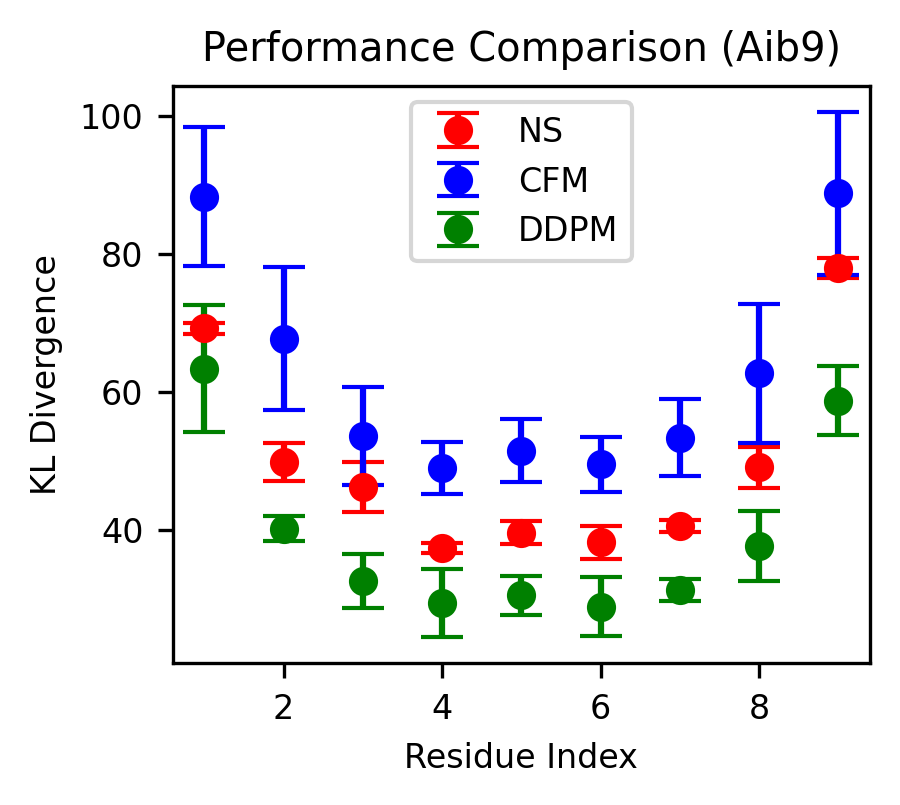

In [26]:
# aib9: model performance comparison vs residue index (no baseline GM fit)

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(3, 2.5))

plt.errorbar(res_array, ns_mean_KLD_aib9, yerr = ns_std_KLD_aib9, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(res_array, cfm_mean_KLD_aib9, yerr = cfm_std_KLD_aib9, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(res_array, ddpm_mean_KLD_aib9, yerr = ddpm_std_KLD_aib9, fmt='o', capsize=5, label='DDPM', color='green')

plt.xlabel('Residue Index')
plt.ylabel('KL Divergence')
plt.title(f'Performance Comparison (Aib9)')

plt.legend()

plt.show()

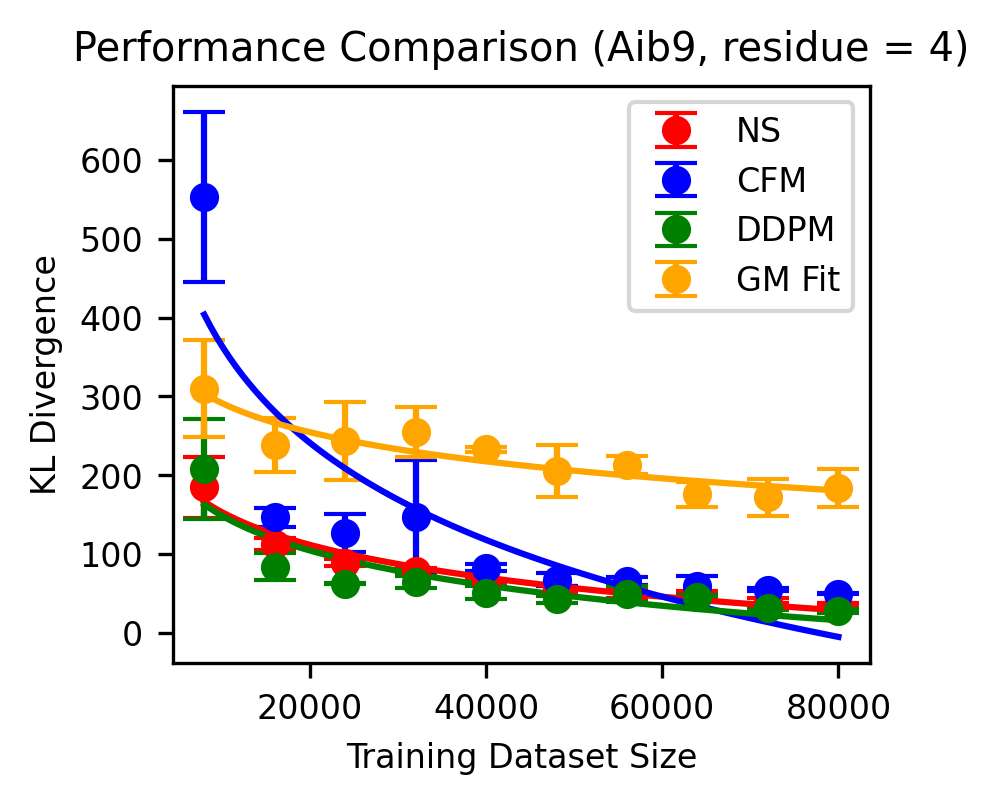

In [5]:
# aib9: model performance comparison vs training data

size_array = np.array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
res_selection = 4

ns_KLD_1_size_aib9 = uta.get_aib9_values_from_keyword('ns', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Residue KLD')[res_selection::9]
ns_KLD_2_size_aib9 = uta.get_aib9_values_from_keyword('ns', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Residue KLD')[res_selection::9]
ns_KLD_3_size_aib9 = uta.get_aib9_values_from_keyword('ns', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Residue KLD')[res_selection::9]

cfm_KLD_1_size_aib9 = uta.get_aib9_values_from_keyword('cfm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Residue KLD')[res_selection::9]
cfm_KLD_2_size_aib9 = uta.get_aib9_values_from_keyword('cfm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Residue KLD')[res_selection::9]
cfm_KLD_3_size_aib9 = uta.get_aib9_values_from_keyword('cfm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Residue KLD')[res_selection::9]

ddpm_KLD_1_size_aib9 = uta.get_aib9_values_from_keyword('ddpm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 1), 'Residue KLD')[res_selection::9]
ddpm_KLD_2_size_aib9 = uta.get_aib9_values_from_keyword('ddpm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 2), 'Residue KLD')[res_selection::9]
ddpm_KLD_3_size_aib9 = uta.get_aib9_values_from_keyword('ddpm', 0, 'total', uta.construct_iterated_keyword_array(size_array, 'varyingsize', 3), 'Residue KLD')[res_selection::9]

bounds = np.array([-4, 4, -4, 4])
split = np.array([0.8, 0.1])
baseline_size_1 = np.array([])
baseline_size_2 = np.array([])
baseline_size_3 = np.array([])
for size in size_array:
    baseline_size_1 = np.append(baseline_size_1, uta.baseline_maker_aib9(res_selection-1, size, split, 10, bounds)[0])
    baseline_size_2 = np.append(baseline_size_2, uta.baseline_maker_aib9(res_selection-1, size, split, 10, bounds)[0])
    baseline_size_3 = np.append(baseline_size_3, uta.baseline_maker_aib9(res_selection-1, size, split, 10, bounds)[0])

ns_all_arrays_size_aib9 = np.array([ns_KLD_1_size_aib9, ns_KLD_2_size_aib9, ns_KLD_3_size_aib9])
cfm_all_arrays_size_aib9 = np.array([cfm_KLD_1_size_aib9, cfm_KLD_2_size_aib9, cfm_KLD_3_size_aib9])
ddpm_all_arrays_size_aib9 = np.array([ddpm_KLD_1_size_aib9, ddpm_KLD_2_size_aib9, ddpm_KLD_3_size_aib9])
baseline_all_arrays_size_aib9 = np.array([baseline_size_1, baseline_size_2, baseline_size_3])

ns_mean_KLD_size_aib9 = np.mean(ns_all_arrays_size_aib9, axis=0)
ns_std_KLD_size_aib9 = np.std(ns_all_arrays_size_aib9, axis=0)

cfm_mean_KLD_size_aib9 = np.mean(cfm_all_arrays_size_aib9, axis=0)
cfm_std_KLD_size_aib9 = np.std(cfm_all_arrays_size_aib9, axis=0)

ddpm_mean_KLD_size_aib9 = np.mean(ddpm_all_arrays_size_aib9, axis=0)
ddpm_std_KLD_size_aib9 = np.std(ddpm_all_arrays_size_aib9, axis=0)

baseline_mean_KLD_size_aib9 = np.mean(baseline_all_arrays_size_aib9, axis=0)
baseline_std_KLD_size_aib9 = np.std(baseline_all_arrays_size_aib9, axis=0)

plt.figure(figsize=(3, 2.5))

plt.errorbar(0.8*size_array, ns_mean_KLD_size_aib9, yerr = ns_std_KLD_size_aib9, fmt='o', capsize=5, label='NS', color='red')
plt.errorbar(0.8*size_array, cfm_mean_KLD_size_aib9, yerr = cfm_std_KLD_size_aib9, fmt='o', capsize=5, label='CFM', color='blue')
plt.errorbar(0.8*size_array, ddpm_mean_KLD_size_aib9, yerr = ddpm_std_KLD_size_aib9, fmt='o', capsize=5, label='DDPM', color='green')
plt.errorbar(0.8*size_array, baseline_mean_KLD_size_aib9, yerr = baseline_std_KLD_size_aib9, fmt='o', capsize=5, label='GM Fit', color='orange')

def log_func(x, a, b):
    return -a * np.log(x) + b
    
ns_popt, ns_pcov = curve_fit(log_func, 0.8*size_array, ns_mean_KLD_size_aib9)
ns_a_fit = ns_popt[0]
ns_b_fit = ns_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *ns_popt), 'r-')

cfm_popt, cfm_pcov = curve_fit(log_func, 0.8*size_array, cfm_mean_KLD_size_aib9)
cfm_a_fit = cfm_popt[0]
cfm_b_fit = cfm_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *cfm_popt), 'b-')

ddpm_popt, ddpm_pcov = curve_fit(log_func, 0.8*size_array, ddpm_mean_KLD_size_aib9)
ddpm_a_fit = ddpm_popt[0]
ddpm_b_fit = ddpm_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *ddpm_popt), 'g-')

bl_popt, bl_pcov = curve_fit(log_func, 0.8*size_array, baseline_mean_KLD_size_aib9)
bl_a_fit = bl_popt[0]
bl_b_fit = bl_popt[1]
x_fit = np.linspace(min(0.8*size_array), max(0.8*size_array), 100)
plt.plot(x_fit, log_func(x_fit, *bl_popt), color='orange')

plt.xlabel('Training Dataset Size')
plt.ylabel('KL Divergence')
plt.title(f'Performance Comparison (Aib9, residue = {res_selection})')

plt.legend()

plt.show()

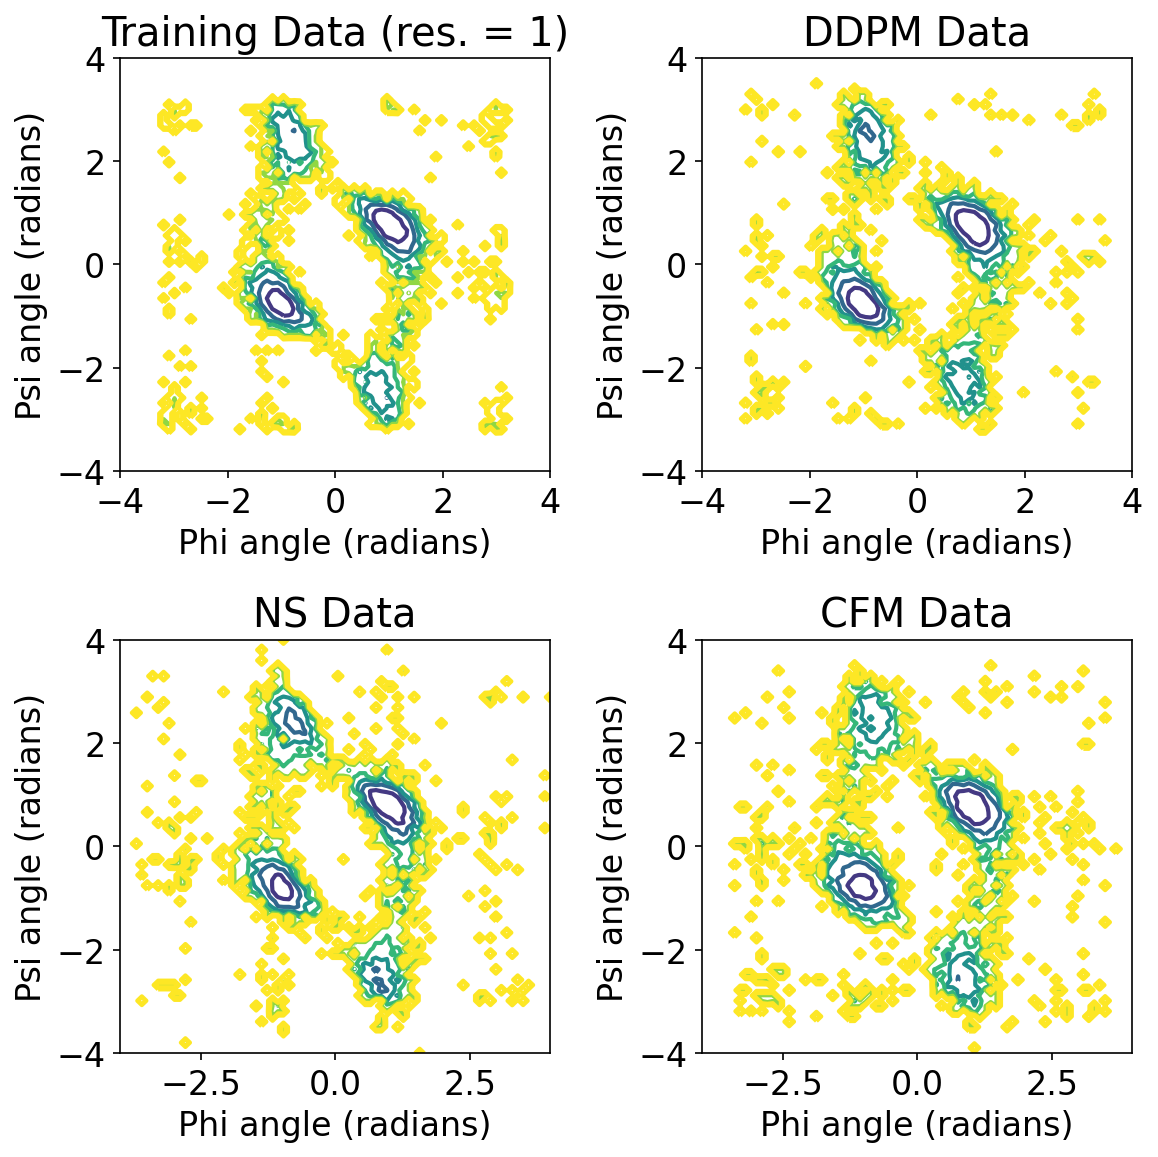

In [23]:
# aib9: data pca comparison

display_residue = 0

train_tot = uta.get_aib9_training_data(0, 'total')
ns_tot = uta.get_aib9_data('ns', 0, 'total', 1)
cfm_tot = uta.get_aib9_data('cfm', 0, 'total', 1)
ddpm_tot = uta.get_aib9_data('ddpm', 0, 'total', 1)

train_aib9 = train_tot[:, int(display_residue*2):int((display_residue+1)*2)]
ns_aib9 = ns_tot[:, int(display_residue*2):int((display_residue+1)*2)]
cfm_aib9 = cfm_tot[:, int(display_residue*2):int((display_residue+1)*2)]
ddpm_aib9 = ddpm_tot[:, int(display_residue*2):int((display_residue+1)*2)]

training_aib9_length = train_aib9.shape[0]
generated_aib9_length = ns_aib9.shape[0]
bounds = np.array([-4, 4, -4, 4])

def FE_hist(data, bounds, binw=0.1, binner=None):

    if binner is None:
        binner = (np.arange(bounds[0], bounds[1] + binw, binw),
                    np.arange(bounds[2], bounds[3] + binw, binw))

    counts, xedges, yedges = np.histogram2d(data[:,0], data[:,1],
                                           bins=binner, density=True)
    prob = counts + 1e-3
    G = -np.log(prob)
    G[G == np.inf] = -1
    G[G == -1] = max(G.ravel())
    G -= min(G.ravel())
    return G, xedges, yedges

restrict = min(training_aib9_length, generated_aib9_length)

G_MD, xe_MD, ye_MD = FE_hist(train_aib9[:restrict], bounds, binw=0.1)
G_NS, xe_NS, ye_NS = FE_hist(ns_aib9[:restrict], bounds, binw=0.1)
G_CFM, xe_CFM, ye_CFM = FE_hist(cfm_aib9[:restrict], bounds, binw=0.1)
G_DDPM, xe_DDPM, ye_DDPM = FE_hist(ddpm_aib9[:restrict], bounds, binw=0.1)

fig, axs = plt.subplots(2,2, figsize=(8,8), dpi=150, tight_layout=True)
plt.rcParams.update({'font.size': 16})
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
axs[0][0].contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[0][1].contour(G_DDPM.T, extent=[xe_DDPM[0], xe_DDPM[-1], ye_DDPM[0], ye_DDPM[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1][0].contour(G_NS.T, extent=[xe_NS[0], xe_NS[-1], ye_NS[0], ye_NS[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1][1].contour(G_CFM.T, extent=[xe_CFM[0], xe_CFM[-1], ye_CFM[0], ye_CFM[-1]],
        linewidths=2, vmin = 0, vmax = 6)

axs[0][0].set_xlabel("Phi angle (radians)")
axs[0][0].set_ylabel("Psi angle (radians)")
axs[0][0].set_title(f"Training Data (res. = {display_residue + 1})")
axs[0][1].set_xlabel("Phi angle (radians)")
axs[0][1].set_ylabel("Psi angle (radians)")
axs[0][1].set_title("DDPM Data")
axs[1][0].set_xlabel("Phi angle (radians)")
axs[1][0].set_ylabel("Psi angle (radians)")
axs[1][0].set_title("NS Data")
axs[1][1].set_xlabel("Phi angle (radians)")
axs[1][1].set_ylabel("Psi angle (radians)")
axs[1][1].set_title("CFM Data")
axs[0][0].set_xlim(bounds[0], bounds[1]);
axs[0][0].set_ylim(bounds[2], bounds[3]);
axs[0][1].set_xlim(bounds[0], bounds[1]);
axs[0][1].set_ylim(bounds[2], bounds[3]);